11_neda_mimfpt_(ML_SVC)

Engin Abdan

### Libraries

In [166]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, roc_curve

from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.style.use('classic')
sns.set_style("white")

### Data

In [167]:
stu = pd.read_excel("std_ins_ml_data.xlsx")

In [168]:
stu.head(1)

,Unnamed: 0,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean,MI_Cat
0,0,20,19,10,16,13,16,17,22,1,95,Intrap


In [169]:
drop_list = ["Unnamed: 0", "Flight_Mean","MI_Cat"]
stu.drop(drop_list, inplace=True, axis=1)
stu.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not
0,20,19,10,16,13,16,17,22,1


### Data infos

In [170]:
stu.describe().T

,count,mean,std,min,25%,50%,75%,max
Ling_Int,100.0,17.72,3.068511,11.0,16.00,17.0,20.0,26.0
Math_Int,100.0,17.75,3.655285,10.0,15.00,17.0,19.0,33.0
Spa_Int,100.0,17.81,3.047420,10.0,15.75,17.5,20.0,26.0
Mus_Int,100.0,17.86,3.110815,10.0,16.00,17.5,20.0,26.0
Nat_Int,100.0,18.16,3.740901,10.0,15.75,18.0,20.0,33.0
Body_Int,100.0,17.20,2.670452,10.0,15.00,17.0,19.0,23.0
Interp_Int,100.0,17.78,2.865962,12.0,16.00,18.0,19.0,26.0
Intrap_Int,100.0,18.07,2.875374,13.0,16.00,18.0,20.0,26.0
Plt_Or_Not,100.0,0.58,0.496045,0.0,0.00,1.0,1.0,1.0


### Data Balance

In [171]:
stu["Plt_Or_Not"].value_counts()

1    58
0    42
Name: Plt_Or_Not, dtype: int64

### Skewness

In [172]:
x = stu.drop(columns=["Plt_Or_Not"]).columns
for i in x:
    if skew(stu[i]) >= -0.5 and skew(stu[i]) < 0.5:
        print(f"{i} \t: {skew(stu[i])} \t>>> Normal")
    elif skew(stu[i]) >= 0.5 and skew(stu[i]) < 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Moderate")
    elif skew(stu[i]) >= 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Skewed")              

Ling_Int 	: 0.12059345356069898 	>>> Normal
Math_Int 	: 1.3051123209475743 	>>> Skewed
Spa_Int 	: 0.2115483275849964 	>>> Normal
Mus_Int 	: 0.32126133203604673 	>>> Normal
Nat_Int 	: 0.8025455431140828 	>>> Moderate
Body_Int 	: 0.16184329645515394 	>>> Normal
Interp_Int 	: 0.22759596608919014 	>>> Normal
Intrap_Int 	: 0.12173869243645632 	>>> Normal


### Heatmap

In [173]:
# plt.figure(figsize=(20,10))
# sns.heatmap(stu.corr(), annot=True, cmap="BrBG")
# plt.tight_layout();

### Pairplot

In [174]:
#sns.pairplot(stu,hue="Plt_Or_Not");

### Corr With Plt_Or_Not

<AxesSubplot:>

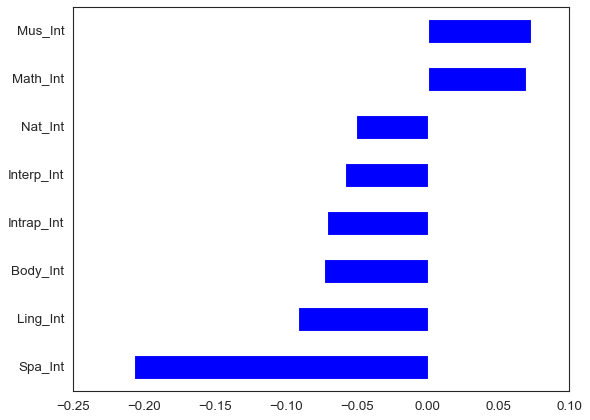

In [175]:
stu.corr()["Plt_Or_Not"].drop("Plt_Or_Not").sort_values().plot.barh()

### Train Test Split

In [176]:
from sklearn.model_selection import train_test_split

x = stu.drop(columns=["Plt_Or_Not"], axis=1)
y = stu["Plt_Or_Not"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Train features shape : ", x_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", x_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (70, 8)
Train target shape   :  (70,)
Test features shape  :  (30, 8)
Test target shape    :  (30,)


### Scaling

In [177]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Model

In [178]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

### Without Scalling

In [179]:
from sklearn.metrics import classification_report,confusion_matrix
model = SVC()

model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 1 15]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.06      0.12        16
           1       0.48      1.00      0.65        14

    accuracy                           0.50        30
   macro avg       0.74      0.53      0.38        30
weighted avg       0.76      0.50      0.37        30



In [180]:
from sklearn.model_selection import cross_validate

model = SVC()

scores = cross_validate(model,
                        x_train,
                        y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.621429
test_recall       0.975000
test_f1           0.756970
test_accuracy     0.614286
dtype: float64

### With Scalling

In [181]:
from sklearn.metrics import classification_report,confusion_matrix
model = SVC()

model.fit(x_train_scaled, y_train)
y_test_pred = model.predict(x_test_scaled)

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 1 15]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.33      0.06      0.11        16
           1       0.44      0.86      0.59        14

    accuracy                           0.43        30
   macro avg       0.39      0.46      0.35        30
weighted avg       0.39      0.43      0.33        30



In [182]:
model = SVC()

scores = cross_validate(model,
                        x_train_scaled,
                        y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.628571
test_recall       1.000000
test_f1           0.769697
test_accuracy     0.628571
dtype: float64

### With Best Parameters (GridsearchCV)

In [183]:
from sklearn.model_selection import GridSearchCV

In [184]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}

In [185]:
model = SVC()
model_grid = GridSearchCV(model, param_grid, verbose=3, refit=True)

In [186]:
model_grid.fit(x_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 2/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.571 total time=   0.0s
[CV 1/5] END ..C=0.0001, gamma=auto, kernel=rbf;, score=0.643 total time=   0.0s
[CV 2/5] END ..C=0.0001, gamma=auto, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [187]:
model_grid.best_params_

{'C': 0.0001, 'gamma': 'scale', 'kernel': 'rbf'}

In [188]:
model_grid.best_estimator_

SVC(C=0.0001)

In [189]:
y_test_pred = model_grid.predict(x_test)

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 0 16]
 [ 0 14]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.47      1.00      0.64        14

    accuracy                           0.47        30
   macro avg       0.23      0.50      0.32        30
weighted avg       0.22      0.47      0.30        30



### Best Threshold

In [190]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, precision_recall_curve, average_precision_score

In [191]:
from sklearn.svm import SVC

model = SVC(C=0.0001, gamma="scale", kernel="rbf", probability=True)
model.fit(x_train, y_train)

SVC(C=0.0001, probability=True)

In [192]:
y_test_pred = model.predict(x_test)
y_test_pred_proba = model.predict_proba(x_test)

In [193]:
test_data = pd.concat([x_test, y_test], axis=1)
test_data["pred1"] = y_test_pred
test_data["pred_proba"] = y_test_pred_proba[:,1]
test_data.head(5)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred1,pred_proba
83,22,19,13,18,21,18,15,19,1,1,0.626039
53,17,13,18,13,13,22,23,20,1,1,0.635998
70,21,16,16,16,19,18,18,20,1,1,0.627201
45,14,14,15,26,20,13,20,14,1,1,0.634695
44,16,17,16,17,21,19,18,20,0,1,0.628668


In [194]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 0 16]
 [ 0 14]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.47      1.00      0.64        14

    accuracy                           0.47        30
   macro avg       0.23      0.50      0.32        30
weighted avg       0.22      0.47      0.30        30



In [195]:
y_train_pred_proba = model.predict_proba(x_train)
roc_auc_score(y_train, y_train_pred_proba[:,1])

fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_pred_proba[:,1])

optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
optimal_threshold_rac

1.6427227541607938

In [196]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold_rac else 0)
test_data.head(5)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred1,pred_proba,pred2
83,22,19,13,18,21,18,15,19,1,1,0.626039,0
53,17,13,18,13,13,22,23,20,1,1,0.635998,0
70,21,16,16,16,19,18,18,20,1,1,0.627201,0
45,14,14,15,26,20,13,20,14,1,1,0.634695,0
44,16,17,16,17,21,19,18,20,0,1,0.628668,0


In [197]:
y_pred2 = test_data["pred2"]
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[16  0]
 [14  0]]
              precision    recall  f1-score   support

           0       0.53      1.00      0.70        16
           1       0.00      0.00      0.00        14

    accuracy                           0.53        30
   macro avg       0.27      0.50      0.35        30
weighted avg       0.28      0.53      0.37        30



In [198]:
y_train_pred_proba = model.predict_proba(x_train)
average_precision_score(y_train, y_train_pred_proba[:,1])

precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:,1])

optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold_prc = thresholds[optimal_idx]
optimal_threshold_prc

0.6354188990917495

In [199]:
test_data["pred3"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold_prc else 0)
test_data.head()

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred1,pred_proba,pred2,pred3
83,22,19,13,18,21,18,15,19,1,1,0.626039,0,0
53,17,13,18,13,13,22,23,20,1,1,0.635998,0,1
70,21,16,16,16,19,18,18,20,1,1,0.627201,0,0
45,14,14,15,26,20,13,20,14,1,1,0.634695,0,0
44,16,17,16,17,21,19,18,20,0,1,0.628668,0,0


In [200]:
y_pred3 = test_data["pred3"]
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[15  1]
 [11  3]]
              precision    recall  f1-score   support

           0       0.58      0.94      0.71        16
           1       0.75      0.21      0.33        14

    accuracy                           0.60        30
   macro avg       0.66      0.58      0.52        30
weighted avg       0.66      0.60      0.54        30



### Prediction

In [201]:
model = SVC(C=0.0001, gamma="scale", kernel="rbf", probability=True, random_state=42)
model.fit(x, y)

SVC(C=0.0001, probability=True, random_state=42)

In [202]:
columns_name = x.columns

In [203]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]
pred_data = pd.DataFrame(data=pred, columns=columns_name)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [204]:
print("optimal_threshold_rac:", optimal_threshold_rac)
print()
print("optimal_threshold_prc:", optimal_threshold_prc)

optimal_threshold_rac: 1.6427227541607938

optimal_threshold_prc: 0.6354188990917495


In [205]:
predictions1 = model.predict(pred_data)[0]
predictions1

1

In [206]:
predictions_proba = model.predict_proba(pred_data)
print(predictions_proba[0])
print(predictions_proba[0][0])
print(predictions_proba[0][1])

[0.45406756 0.54593244]
0.4540675559949214
0.5459324440050786


In [207]:
predictions2 = [1 if predictions_proba[0][1] >= optimal_threshold_prc else 0][0] 
predictions2

0

In [208]:
pred_data["pred1"] = predictions1
pred_data["pred_proba_1"] = predictions_proba[0][1]
pred_data["pred2"] = predictions2
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,pred1,pred_proba_1,pred2
0,35,36,34,37,15,17,19,21,1,0.545932,0


In [209]:
MI_Cat = columns_name[np.argmax(pred_data)]
MI_Score = max(pred[0])
Best_Threshold = optimal_threshold_prc

if predictions_proba[0][1] >= Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba_1\t: {predictions_proba[0][1]}\nPrediction\t\t: 1\nResult\t\t\t: Pilot")
if predictions_proba[0][1] < Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba_1\t: {predictions_proba[0][1]}\nPrediction\t\t: 0\nResult\t\t\t: Not Pilot")

MI_Cat			: Mus_Int
MI_Score		: 37
Best_Threshold		: 0.6354188990917495
Predictions_Proba_1	: 0.5459324440050786
Prediction		: 0
Result			: Not Pilot
